In [9]:
import pystare

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import sys

In [25]:
def divert_stderr():
    sys.stderr = open('stderr.out','w')  
    return

def restore_stderr(verbose = True):
    sys.stderr.close()
    if verbose:
        with open('stderr.out') as f:
            count = sum(1 for _ in f)
        if count > 0:
            print(count, 'warnings or errors encountered while stderr diverted. See stderr.out.')
    sys.stderr = sys.__stderr__
    return

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs
import cartopy.feature as cf

import numpy
import shapely

# Some helper functions for plotting & printing.

class figax_container(object):
    def __init__(self,figax):
        self.fig = figax[0]
        self.ax  = figax[1]
        return

def add_coastlines(figax,set_global=False):
    "Add coastlines to the plot."
    ax = figax.ax
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,set_global=False
        ,set_coastlines=True
        ,show=True
        ,color=None
        ,lw=1
        ,verbose = True
        ):

    if figax is None:
        figax = figax_container(plt.subplots(1,subplot_kw=plot_options))
        if set_global:
            figax.ax.set_global()
        if set_coastlines:
            figax.ax.coastlines()
    else:
        ax = figax.ax
    
    if spatial_index_values is not None:
        # Calculate vertices and interconnection matrix
        lons,lats,intmat = pystare.triangulate_indices(spatial_index_values)
        
        # Make triangulation object & plot
        siv_triang = tri.Triangulation(lons,lats,intmat)
        # print('plot type triang: ',type(siv_triang))
        divert_stderr()
        figax.ax.triplot(siv_triang,c=color,transform=plot_options['transform'],lw=lw)
        restore_stderr(verbose=verbose)
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

def lonlat_from_coords(coords):
    tmp = numpy.array(coords)
    lat=tmp[:,1]
    lon=tmp[:,0]
    return lon,lat

km  = 1 # Unit of length
deg = 1 # Unit of angle

# Set up the projection and transformation
# proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson()
proj        = ccrs.Mollweide()
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

set_global   = True

Spatial ID 0x0000000000000000 0


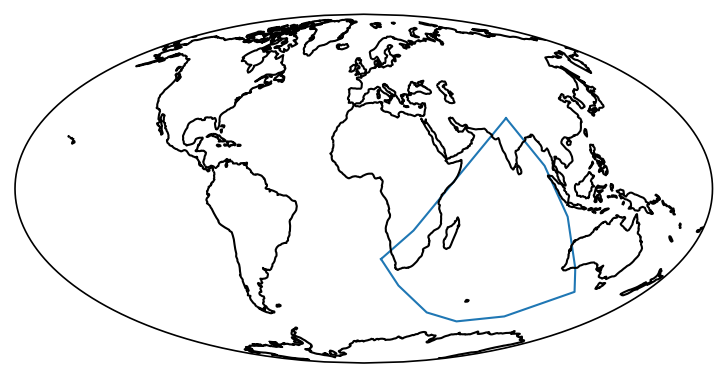

In [32]:
figax = add_coastlines(hello_plot(set_coastlines=False,set_global=set_global,show=False,plot_options=plot_options))

siv = 0 # STARE Spatial Index Value, geolocation bits are 0, resolution level is 0.
print("Spatial ID",hex16(siv),siv)

figax = hello_plot([siv],figax,verbose=False)


Spatial ID 0x0000000000000000 0
Spatial ID 0x0800000000000000 576460752303423488
Spatial ID 0x1000000000000000 1152921504606846976
Spatial ID 0x1800000000000000 1729382256910270464
Spatial ID 0x2000000000000000 2305843009213693952
Spatial ID 0x2800000000000000 2882303761517117440
Spatial ID 0x3000000000000000 3458764513820540928
Spatial ID 0x3800000000000000 4035225266123964416


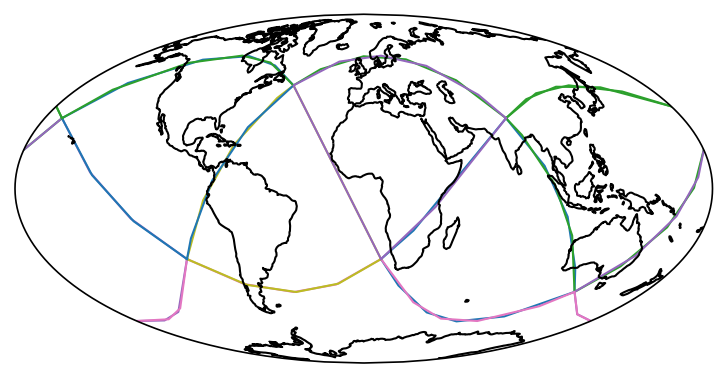

In [33]:
# level_zero_increment = 1 << 59
level_zero_increment = pystare.spatial_increment_from_level(0)
figax = add_coastlines(hello_plot(set_coastlines=False,set_global=set_global,show=False,plot_options=plot_options))

for siv in range(0,8*level_zero_increment,level_zero_increment):
    print("Spatial ID",hex16(siv),siv)
    hello_plot([siv],figax,plot_options,show=False,verbose=False)
plt.show()

Spatial ID 0x0000000000000001 1
Spatial ID 0x0200000000000001 144115188075855873
Spatial ID 0x0400000000000001 288230376151711745
Spatial ID 0x0600000000000001 432345564227567617
Spatial ID 0x0800000000000001 576460752303423489
Spatial ID 0x0a00000000000001 720575940379279361
Spatial ID 0x0c00000000000001 864691128455135233
Spatial ID 0x0e00000000000001 1008806316530991105
Spatial ID 0x1000000000000001 1152921504606846977
Spatial ID 0x1200000000000001 1297036692682702849
Spatial ID 0x1400000000000001 1441151880758558721
Spatial ID 0x1600000000000001 1585267068834414593
Spatial ID 0x1800000000000001 1729382256910270465
Spatial ID 0x1a00000000000001 1873497444986126337
Spatial ID 0x1c00000000000001 2017612633061982209
Spatial ID 0x1e00000000000001 2161727821137838081
Spatial ID 0x2000000000000001 2305843009213693953
Spatial ID 0x2200000000000001 2449958197289549825
Spatial ID 0x2400000000000001 2594073385365405697
Spatial ID 0x2600000000000001 2738188573441261569
Spatial ID 0x28000000000

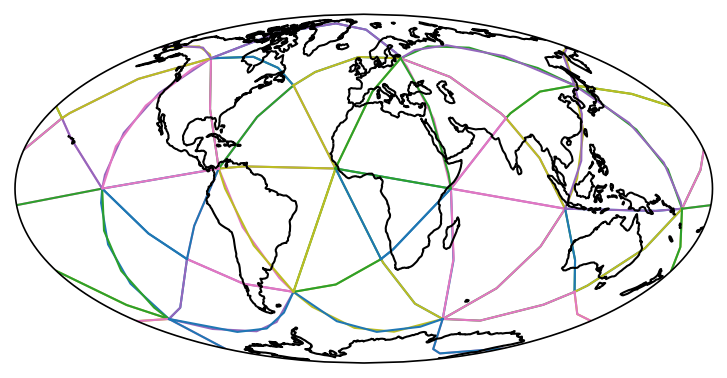

In [37]:
# level_one_increment = 1 << 57
level_one_increment = pystare.spatial_increment_from_level(1)
figax = add_coastlines(hello_plot(set_coastlines=False,set_global=set_global,show=False,plot_options=plot_options))

for siv in range(1,4*8*level_one_increment+1,level_one_increment):
    print("Spatial ID",hex16(siv),siv)
    hello_plot([siv],figax,plot_options,show=False,verbose=False)
plt.show()

Spatial ID 0x0000000000000001 1
50 warnings or errors encountered while stderr diverted. See stderr.out.
Spatial ID 0x0200000000000001 144115188075855873
63 warnings or errors encountered while stderr diverted. See stderr.out.
Spatial ID 0x0400000000000001 288230376151711745
19 warnings or errors encountered while stderr diverted. See stderr.out.
Spatial ID 0x0600000000000001 432345564227567617
40 warnings or errors encountered while stderr diverted. See stderr.out.


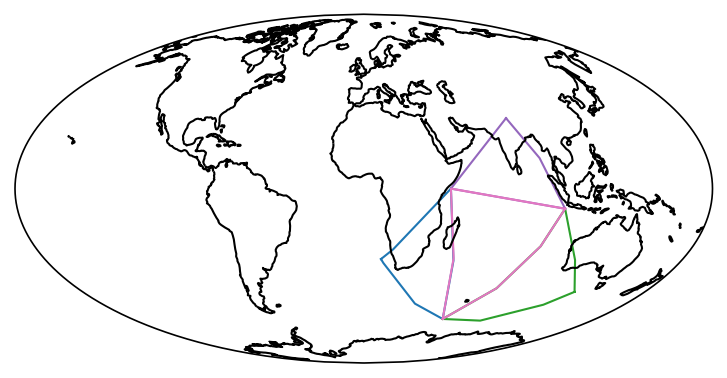

In [34]:
# level_one_increment = 1 << 57
level_one_increment = pystare.spatial_increment_from_level(1)
figax = add_coastlines(hello_plot(set_coastlines=False,set_global=set_global,show=False,plot_options=plot_options))

# Iterate over resolution level 1 triangles making up siv = 0.
for siv in range(0,4*level_one_increment,level_one_increment):
    siv = siv + 1 # set the resolution level to 1
    print("Spatial ID",hex16(siv),siv)
    hello_plot([siv],figax,plot_options,show=False)
plt.show()